In [1]:
import requests
from bs4 import BeautifulSoup
import json

In [2]:
import time

In [3]:
# Wall time
# Record the start time (wall time)
start_time_wall = time.time()
end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")


# CPU time
# Record the start time (total execution time)
start_time_cpu = time.process_time()
end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")


Elapsed Wall Time: 0.000000 seconds
Elapsed CPU Time: 0.000000 seconds


# 1. Scraping

## 1.1 starting code wall and CPU time

In [4]:
start_time_wall = time.time()
start_time_cpu = time.process_time()

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []

for url in urls:
    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')

    blocks = soup.find_all('details', class_= 'expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        
        # print(f"question: {question}")
        # print(f"answer: {answer_text}")
        faqs.append({'question': question, 'answer': answer_text})

faqs_json = json.dumps(faqs, indent=4)

with open('faqs.json', 'w') as file:
    file.write(faqs_json)
    
    
end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.4f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.4f} seconds")

Elapsed Wall Time: 0.8418 seconds
Elapsed CPU Time: 0.1875 seconds


## 1.2 starting code line_profiler

In [5]:
%load_ext line_profiler

In [6]:
from line_profiler import LineProfiler

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []


def process_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    blocks = soup.find_all('details', class_='expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        
        faqs.append({'question': question, 'answer': answer_text})

profiler = LineProfiler()
profiler.add_function(process_url)

# Profile the execution of each URL
for url in urls:
    profiler.runcall(process_url, url)

profiler.print_stats()

Timer unit: 1e-07 s

Total time: 0.814214 s
File: C:\Users\LN\AppData\Local\Temp/ipykernel_21536/2093226472.py
Function: process_url at line 17

Line #      Hits         Time  Per Hit   % Time  Line Contents
    17                                           def process_url(url):
    18         8    7994637.0 999329.6     98.2      response = requests.get(url)
    19         8     128532.0  16066.5      1.6      soup = BeautifulSoup(response.text, 'html.parser')
    20                                               
    21         8      18892.0   2361.5      0.2      blocks = soup.find_all('details', class_='expandable singleton')
    22         8         80.0     10.0      0.0      for b in blocks:
    23                                                   question = b.find('summary', class_='expandable-item-title').text.strip()
    24                                                   answers_paragraphs = b.find_all('p')
    25                                                   answer_text

## 1.3 multi processing

In [7]:
from multiprocessing import Pool, cpu_count

In [8]:
cpu_count()

8

In [9]:
%%writefile mp.py


import requests
from bs4 import BeautifulSoup
import json


def scrape_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    faq_items = []
    blocks = soup.find_all('details', class_='expandable singleton')
    for block in blocks:
        question = block.find('summary', class_='expandable-item-title').text.strip()
        answer_paragraphs = block.find_all('p')
        answer_text = ''
        for paragraph in answer_paragraphs:
            for link in paragraph.find_all('a'):
                if 'href' in link.attrs:
                    link_text = link.text
                    link_url = link['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    link.replace_with(markdown_link)
            text_with_markdown_links = ''.join(str(content) for content in paragraph.contents).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        faq_items.append({'question': question, 'answer': answer_text})
    
    return faq_items

Overwriting mp.py


In [10]:
import mp

start_time_wall = time.time()
start_time_cpu = time.process_time()


urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

if __name__ == "__main__":
    # Create a Pool of worker processes
    #pool = Pool()
    num_processes = cpu_count()  # Use all available CPU cores
    pool = Pool(processes=num_processes) 

    # Use multiprocessing to scrape URLs in parallel
    results = pool.map(mp.scrape_url, urls)

    # Flatten the list of results
    faqs = [item for sublist in results for item in sublist]

    # Convert FAQs to JSON format
    faqs_json = json.dumps(faqs, indent=4)

    # Write FAQs to a JSON file
    with open('faqs.json', 'w') as file:
        file.write(faqs_json)

    # Close the pool of worker processes
    pool.close()
    pool.join()

    end_time_wall = time.time()
    elapsed_wall_time = end_time_wall - start_time_wall
    print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

    end_time_cpu = time.process_time()
    elapsed_cpu_time = end_time_cpu - start_time_cpu
    print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

Elapsed Wall Time: 1.716238 seconds
Elapsed CPU Time: 0.046875 seconds


## 1.4 multi threading

In [11]:
import threading

start_time_wall = time.time()
start_time_cpu = time.process_time()

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []

def process_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    blocks = soup.find_all('details', class_='expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        
        # Append the FAQ to the list (thread-safe operation)
        faqs.append({'question': question, 'answer': answer_text})

# Create thread objects for each URL
threads = []
for url in urls:
    thread = threading.Thread(target=process_url, args=(url,))
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

# Serialize FAQs to JSON
faqs_json = json.dumps(faqs, indent=4)

# Write FAQs to a file
with open('faqs.json', 'w') as file:
    file.write(faqs_json)

# Calculate and print elapsed time
end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")


Elapsed Wall Time: 0.187133 seconds
Elapsed CPU Time: 0.421875 seconds


# 2. statistics of word counting

In [12]:
# Load JSON data from faqs.json
with open('faqs.json', 'r') as file:
    faqs = json.load(file)

In [13]:
import re
from line_profiler import LineProfiler

## 2.1 starting code

In [14]:
def extract_sentences(text):
    # Use regex to split text into sentences
    sentences = re.split(r'[.!?]', text)
    # Filter out empty sentences
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences
def word_count(sentence):
    # Split sentence into words and count them
    words = sentence.split()
    return len(words)

start_time_wall = time.time()
start_time_cpu = time.process_time()

# Iterate over each FAQ item and extract sentences
sentences = []

for faq in faqs:
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    sentences.extend(question_sentences)
    sentences.extend(answer_sentences)
# Calculate word count for each sentence
sentence_word_counts = [(sentence, word_count(sentence)) for sentence in sentences]

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")
end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

Elapsed Wall Time: 0.000000 seconds
Elapsed CPU Time: 0.000000 seconds


In [15]:
# Print or process the word counts
for sentence, count in sentence_word_counts:
    print(f"Sentence: '{sentence}'")
    print(f"Word Count: {count}")
    print("---")

## 2.2 concurrent execution

In [16]:
import os
os.cpu_count() # number of worker threads

8

In [17]:
import concurrent.futures

start_time_wall = time.time()
start_time_cpu = time.process_time()

# Function to process FAQ item and extract sentences
def process_faq(faq):
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    return question_sentences + answer_sentences

# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit tasks for each FAQ item and collect results
    all_sentences = executor.map(process_faq, faqs)

# Flatten the list of sentences
sentences = [sentence for sublist in all_sentences for sentence in sublist]

# Calculate word count for each sentence in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    sentence_word_counts = list(executor.map(word_count, sentences))

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

Elapsed Wall Time: 0.002006 seconds
Elapsed CPU Time: 0.000000 seconds


## 2.3 JIT and Numba

In [18]:
import numba as nb

start_time_wall = time.time()
start_time_cpu = time.process_time()

@nb.jit
def word_count(sentence):
    # Split sentence into words and count them
    words = sentence.split()
    return len(words)

# Iterate over each FAQ item and extract sentences
sentences = []

for faq in faqs:
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    sentences.extend(question_sentences)
    sentences.extend(answer_sentences)

# Calculate word count for each sentence
sentence_word_counts = [(sentence, word_count(sentence)) for sentence in sentences]

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

ModuleNotFoundError: No module named 'numba'

## 2.4 Plotting the distribution graph

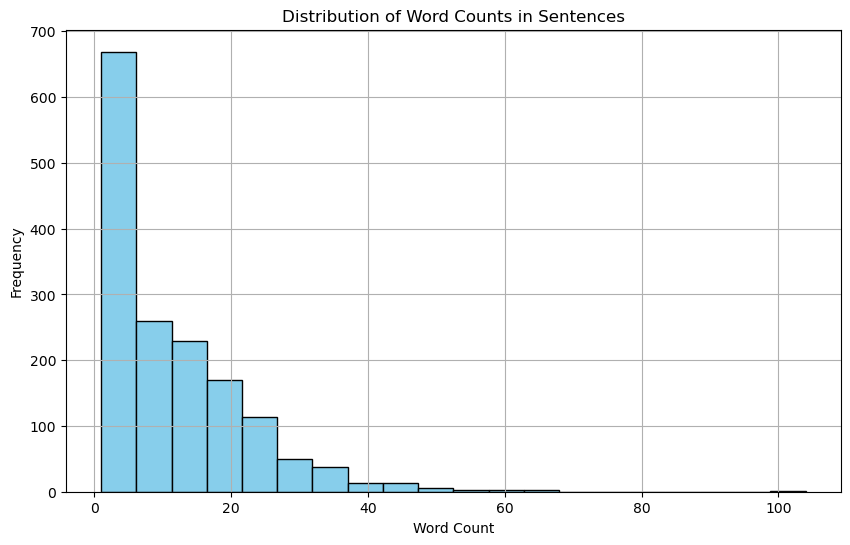

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(sentence_word_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Sentences')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()